In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Baseline models
lin_reg = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1, max_iter=10000)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)

models = {
    "Linear Regression": lin_reg,
    "Ridge": ridge,
    "Lasso": lasso,
    "Elastic Net": elastic
}

print(" Models initialized for CV")


 Models initialized for CV


In [6]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=20, noise=15, random_state=42)

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import numpy as np


# Dictionary to store results
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")  
    cv_results[name] = scores
    print(f"{name}: Mean R² = {np.mean(scores):.4f} | Std = {np.std(scores):.4f}")


Linear Regression: Mean R² = 0.9856 | Std = 0.0015
Ridge: Mean R² = 0.9856 | Std = 0.0015
Lasso: Mean R² = 0.9857 | Std = 0.0016
Elastic Net: Mean R² = 0.9825 | Std = 0.0012


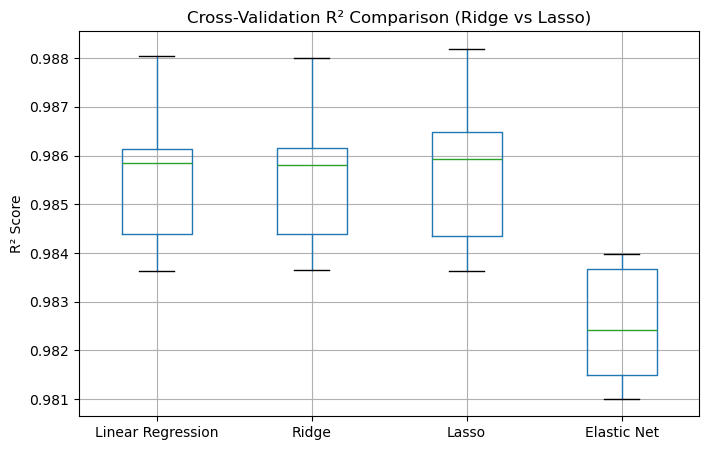

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert CV results into DataFrame for visualization
cv_df = pd.DataFrame(cv_results)

# Plot
plt.figure(figsize=(8, 5))
cv_df.boxplot()
plt.title("Cross-Validation R² Comparison (Ridge vs Lasso)")
plt.ylabel("R² Score")
plt.show()


In [12]:
# Evaluate both models on test set
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)  # R² on test data
    print(f"{name} Test R²: {test_score:.4f}")


Linear Regression Test R²: 0.9885
Ridge Test R²: 0.9884
Lasso Test R²: 0.9886
Elastic Net Test R²: 0.9837
